In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('seaborn-pastel')
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loandata/Loan payments data.csv


In [2]:
data = pd.read_csv('/kaggle/input/loandata/Loan payments data.csv')

In [3]:
print(data.shape)
data.head()

(500, 11)


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

- 'Paidoff' = 기한 내 대출금 모두 상환
- 'collection' = 연체
- 'collection paidoff' = 기한 지나서 모두 상환

# data description

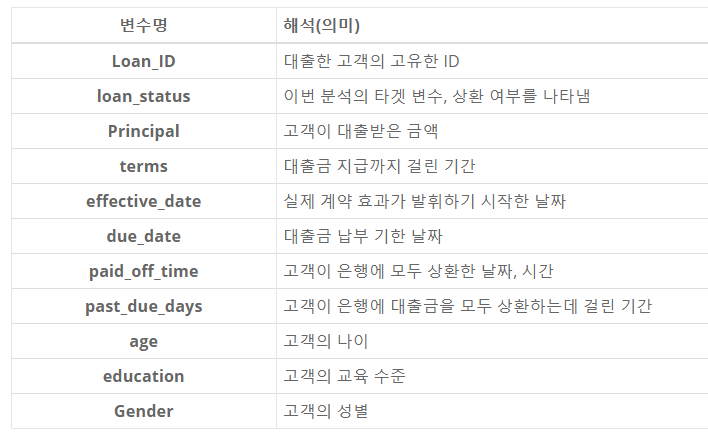

# EDA

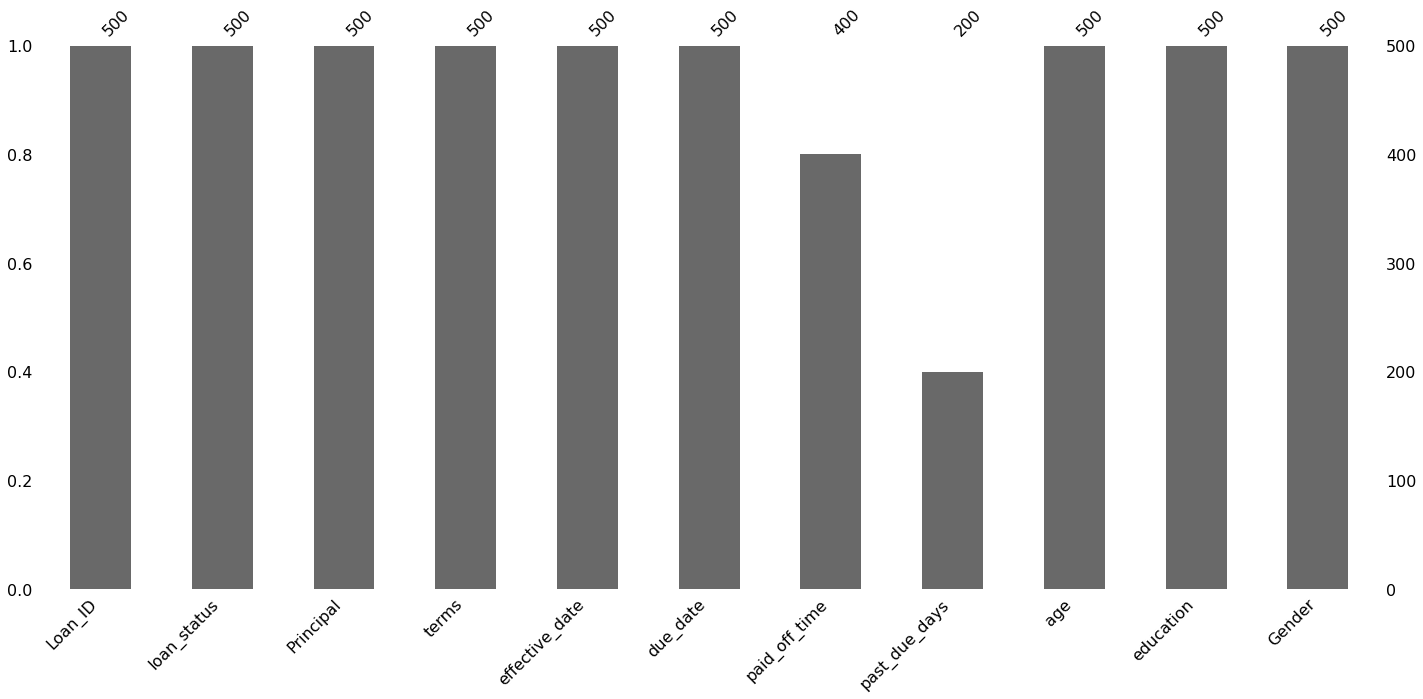

In [5]:
import missingno as msno
msno.bar(data)

In [6]:
data[['paid_off_time','past_due_days']].isnull().sum()

paid_off_time    100
past_due_days    300
dtype: int64

In [7]:
data[(data['paid_off_time'].isnull()) & (data['loan_status'] != 'COLLECTION')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


In [8]:
data[data['past_due_days'].isnull() & (data['loan_status'] != 'PAIDOFF')]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


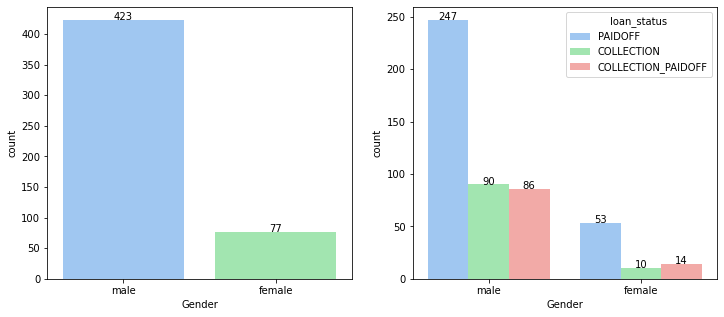

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data['Gender'],ax=ax1)
sns.countplot(data['Gender'],hue=data['loan_status'],ax=ax2)

for p in ax1.patches:   
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
for p in ax2.patches:   
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10) 

Overall, it can be seen that the man had a lot of loans.

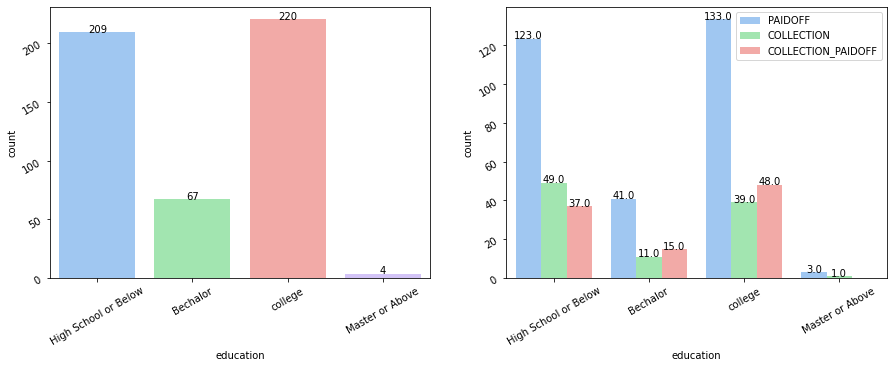

In [10]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['education'],ax=ax1)
sns.countplot(data['education'],hue= data['loan_status'],ax=ax2)
ax1.tick_params(labelrotation=30)
ax2.tick_params(labelrotation=30)
plt.legend(loc='best')
for p in ax1.patches:   
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)
for p in ax2.patches:   
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10) 

In [11]:
data[['loan_status', 'education', 'Loan_ID']].groupby(['loan_status', 'education']).agg(['count'])

Loan_ID
                                          count
loan_status        education                   
COLLECTION         Bechalor                  11
                   High School or Below      49
                   Master or Above            1
                   college                   39
COLLECTION_PAIDOFF Bechalor                  15
                   High School or Below      37
                   college                   48
PAIDOFF            Bechalor                  41
                   High School or Below     123
                   Master or Above            3
                   college                  133

<Figure size 864x576 with 0 Axes>

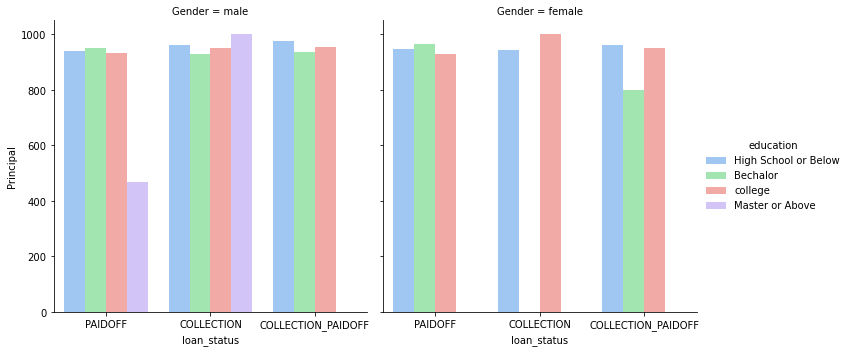

In [12]:
plt.figure(figsize=(12,8))
sns.catplot(data=data,x='loan_status',y='Principal',col='Gender',hue='education',kind='bar',ci=False)

- The characteristic of delinquent borrowers is that they borrow a lot of money.
- Among them, the man with the highest level of education, Master or Above, borrowed the most money and delayed the payment. However, we must be careful not to make the fallacy of hasty generalization as it is a minority.


In [13]:
data['age'].describe()

count    500.000000
mean      31.116000
std        6.084784
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

In [14]:
data['age_range'] = pd.cut(data['age'],[10,20,30,40,50,60],labels=['10s','20s','30s','40s','50s'])

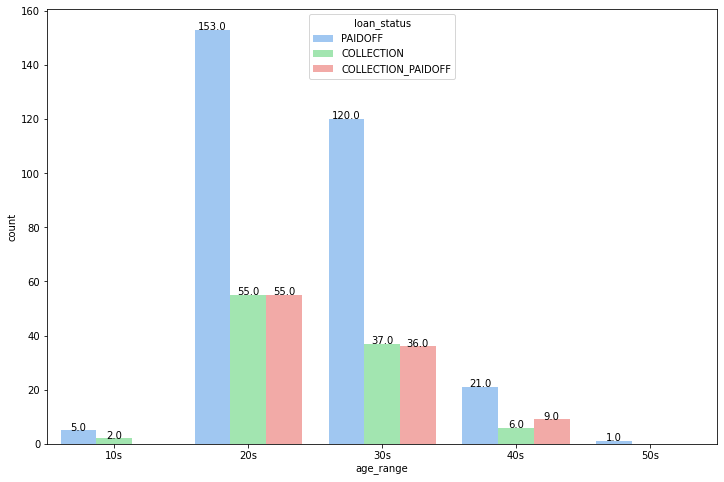

In [15]:
plt.figure(figsize=(12,8))
ax=sns.countplot(data['age_range'],hue=data['loan_status'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontsize=10)

In [16]:
data[['loan_status', 'age_range', 'Loan_ID']].groupby(['loan_status', 'age_range']).agg(['count'])

Loan_ID
                               count
loan_status        age_range        
COLLECTION         10s             2
                   20s            55
                   30s            37
                   40s             6
                   50s             0
COLLECTION_PAIDOFF 10s             0
                   20s            55
                   30s            36
                   40s             9
                   50s             0
PAIDOFF            10s             5
                   20s           153
                   30s           120
                   40s            21
                   50s             1

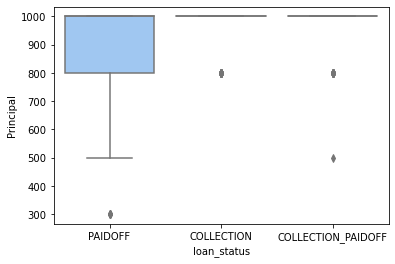

In [17]:
sns.boxplot(x=data['loan_status'],y=data['Principal'])

- Most of the defaulters borrowed high loans.

In [18]:
data[['loan_status', 'Principal', 'Loan_ID']].groupby(['loan_status', 'Principal']).agg(['count'])

Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220

# Preprocessing

In [19]:
import datetime
data['effective_date']=data['effective_date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y'))
data['due_date']=data['due_date'].apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y'))

In [20]:
data['paid_off_time'] = data['paid_off_time'].apply(lambda x: datetime.datetime.strptime(x,'%m/%d/%Y %H:%M') if type(x) == str else x)

In [21]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,age_range
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,40s
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,40s
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,30s
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,20s
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,20s


####  replace missing values

- The column in past_due_days is treated as missing because it is not overdue.
- Therefore, the missing values are replaced by the due date paid minus the date of data creation.
- The data creation date is the date past_due_days is added to the value of missing values by due_days.

In [22]:
# proof
from datetime import timedelta
print(data['due_date'][300] + timedelta(days = data['past_due_days'][300]))
print(data['due_date'][301] + timedelta(days = data['past_due_days'][301]))

2016-12-08 00:00:00
2016-12-08 00:00:00


Missing values of paid_off_time are replaced by 2016-12-08.

In [23]:
na_idx = data[data['paid_off_time'].isnull()].index
for i in na_idx:
    data['paid_off_time'].iloc[i] = data['due_date'][i] + timedelta(days = data['past_due_days'][i])

In [24]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,age_range
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,NaN,45,High School or Below,male,40s
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,NaN,50,Bechalor,female,40s
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,NaN,33,Bechalor,female,30s
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,NaN,27,college,male,20s
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,NaN,28,college,female,20s


In [25]:
data['paid_off_time'] = data['paid_off_time'].apply(lambda x: '{}-{}-{}'.format(x.year,x.month,x.day))

In [26]:
data['paid_off_time'] = data['paid_off_time'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d'))

In [27]:
idx = data[data['past_due_days'].isnull()].index
data['past_due_days'][idx] = data['paid_off_time'][idx] - data['due_date'][idx]

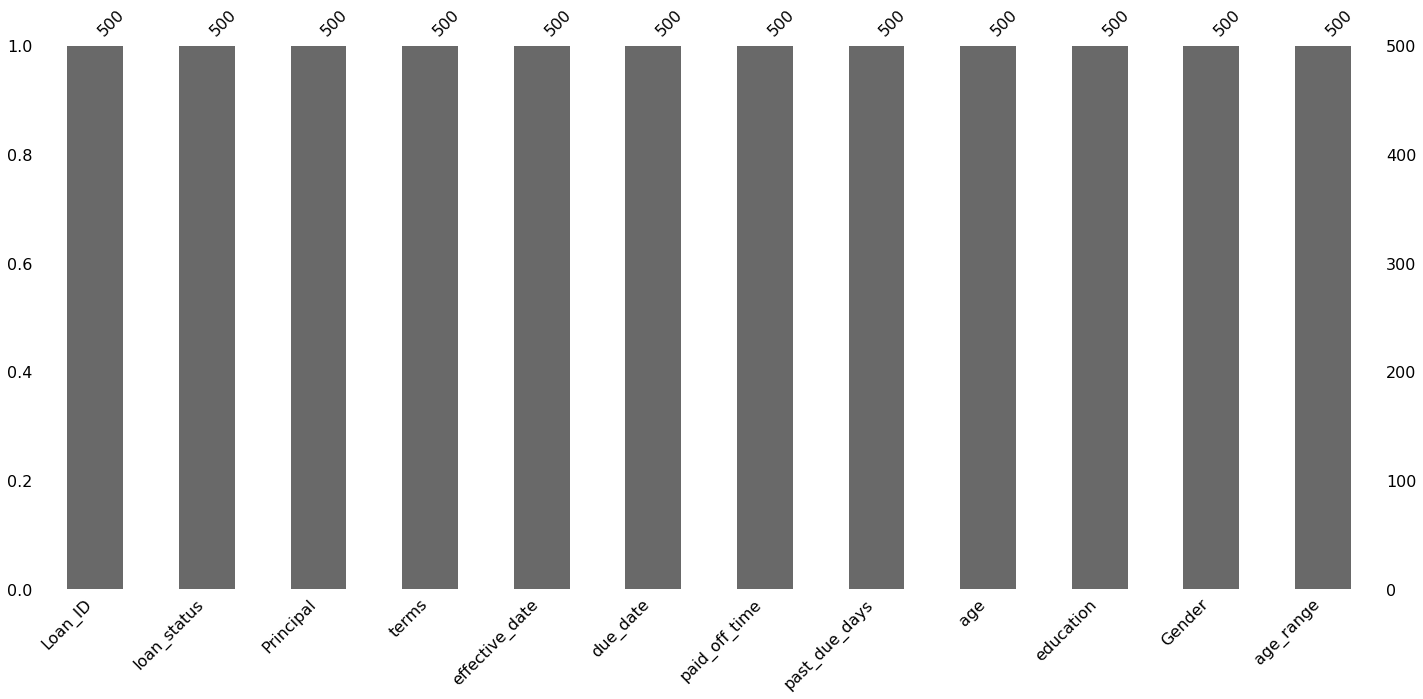

In [28]:
msno.bar(data)

We have dealt with all the missing values.

In [29]:
try:
    for i in range(len(data['past_due_days'])):
        data['past_due_days'][i] = data['past_due_days'][i].days
except:
    pass

In [30]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [31]:
data[data['loan_status'] == 'COLLECTION']

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,age_range
300,xqd20160301,COLLECTION,1000,15,2016-09-09,2016-09-23,2016-12-08,76,29,college,male,20s
301,xqd20160302,COLLECTION,1000,30,2016-09-09,2016-10-08,2016-12-08,61,37,High School or Below,male,30s
302,xqd20160303,COLLECTION,1000,30,2016-09-09,2016-10-08,2016-12-08,61,33,High School or Below,male,30s
303,xqd20160304,COLLECTION,800,15,2016-09-09,2016-09-23,2016-12-08,76,27,college,male,20s
304,xqd20160305,COLLECTION,800,15,2016-09-09,2016-09-23,2016-12-08,76,24,Bechalor,male,20s
...,...,...,...,...,...,...,...,...,...,...,...,...
395,xqd20160396,COLLECTION,1000,30,2016-09-11,2016-10-10,2016-12-08,59,25,High School or Below,male,20s
396,xqd20160397,COLLECTION,1000,30,2016-09-12,2016-10-11,2016-12-08,58,33,High School or Below,male,30s
397,xqd20160398,COLLECTION,800,15,2016-09-12,2016-09-26,2016-12-08,73,39,college,male,30s
398,xqd20160399,COLLECTION,1000,30,2016-09-12,2016-11-10,2016-12-08,28,28,college,male,20s


I found something strange while looking at the data.

In some cases, it was against the formula 'due_date'-'effective_date' = term.

Let's see the index number 398.

According to the formula, it should be 60 but 'term' is 30.

So I assumed that there were times when the period was extended.

However, if there is only one case, it will be judged as a data error.

In [32]:
data['tmp']=data['due_date'] - data['effective_date'] + timedelta(days=1)
data['tmp'] = data['tmp'].dt.days

In [33]:
extension_idx = []
for i in range(data.shape[0]):
    if data['terms'][i] < data['tmp'][i]:
        extension_idx.append(i)
    else:
        continue
data.iloc[extension_idx]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,age_range,tmp
11,xqd20160012,PAIDOFF,1000,15,2016-09-10,2016-10-09,2016-10-09,0,39,High School or Below,male,30s,30
42,xqd20160043,PAIDOFF,1000,7,2016-09-11,2016-09-24,2016-09-24,0,31,Bechalor,male,30s,14
85,xqd20160086,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,0,33,college,male,30s,60
109,xqd20160110,PAIDOFF,1000,7,2016-09-11,2016-09-24,2016-09-24,0,29,college,male,20s,14
111,xqd20160112,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,0,27,college,female,20s,60
122,xqd20160123,PAIDOFF,1000,15,2016-09-11,2016-10-25,2016-10-25,0,20,college,male,10s,45
137,xqd20160138,PAIDOFF,1000,15,2016-09-11,2016-10-25,2016-10-25,0,22,college,male,20s,45
146,xqd20160147,PAIDOFF,1000,30,2016-09-11,2016-11-09,2016-11-09,0,26,college,female,20s,60
150,xqd20160151,PAIDOFF,1000,15,2016-09-12,2016-10-26,2016-10-26,0,29,college,male,20s,45
165,xqd20160166,PAIDOFF,1000,30,2016-09-12,2016-11-10,2016-11-10,0,24,High School or Below,male,20s,60


Therefore, I will create a new column called 'extension'.

In [34]:
extension_idx = []
for i in range(data.shape[0]):
    if data['terms'][i] < data['tmp'][i]:
        data['tmp'][i] = 'Y'
    else:
        data['tmp'][i] = 'N'

In [35]:
data.rename(columns={'tmp':'extension'},inplace=True)

In [36]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,age_range,extension
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14,-23,45,High School or Below,male,40s,N
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07,0,50,Bechalor,female,40s,N
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25,-12,33,Bechalor,female,30s,N
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22,0,27,college,male,20s,N
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23,-15,28,college,female,20s,N


Variable conversion is easy to model

In [37]:
data['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

In [38]:
loan_dic = {'PAIDOFF':0,'COLLECTION_PAIDOFF':1,'COLLECTION':2}
data['loan_status'] = data['loan_status'].map(loan_dic)

Delete variables of type datetime.

This is because the datetime format is not only applicable to the model, but has already obtained a new derived variable that can be obtained from this variable.

And the age variable is deleted because there is an age_range variable.

In [39]:
data.drop(['effective_date','due_date','paid_off_time','age'],axis=1,inplace=True)

The category type is converted to OneHotEncoding.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Loan_ID        500 non-null    object  
 1   loan_status    500 non-null    int64   
 2   Principal      500 non-null    int64   
 3   terms          500 non-null    int64   
 4   past_due_days  500 non-null    object  
 5   education      500 non-null    object  
 6   Gender         500 non-null    object  
 7   age_range      500 non-null    category
 8   extension      500 non-null    object  
dtypes: category(1), int64(3), object(5)
memory usage: 32.1+ KB


In [41]:
data['past_due_days'] = data['past_due_days'].astype(float)

In [42]:
category_features = ['education','Gender','age_range','extension']
for i in category_features:
    data[i] = data[i].astype('category')

In [43]:
id_ = data['Loan_ID']
data = pd.get_dummies(data.drop(['Loan_ID'],axis=1))

In [44]:
data

,loan_status,Principal,terms,past_due_days,education_Bechalor,education_High School or Below,education_Master or Above,education_college,Gender_female,Gender_male,age_range_10s,age_range_20s,age_range_30s,age_range_40s,age_range_50s,extension_N,extension_Y
0,0,1000,30,-23.0,0,1,0,0,0,1,0,0,0,1,0,1,0
1,0,1000,30,0.0,1,0,0,0,1,0,0,0,0,1,0,1,0
2,0,1000,30,-12.0,1,0,0,0,1,0,0,0,1,0,0,1,0
3,0,1000,15,0.0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,0,1000,30,-15.0,0,0,0,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1000,30,3.0,0,1,0,0,0,1,0,1,0,0,0,1,0
496,1,1000,15,14.0,0,1,0,0,0,1,0,1,0,0,0,1,0
497,1,800,15,3.0,0,0,0,1,0,1,0,1,0,0,0,1,0
498,1,1000,30,1.0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [45]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=.2)
print("train shape:{}\ntest shape:{}".format(train.shape,test.shape))

train shape:(400, 17)
test shape:(100, 17)


In [46]:
train = train.reset_index(drop=True)
train_x = train.drop('loan_status',axis=1)
train_y = train['loan_status']
test = test.reset_index(drop=True)
test_x = test.drop('loan_status',axis=1)
test_y = test['loan_status']

# Modeling

- Ensemble and xgboost

In [47]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [48]:
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
gra = GradientBoostingClassifier()
xgb = XGBClassifier()

In [49]:
rf.fit(train_x,train_y)
pred = rf.predict(test_x)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y.values,pred)

1.0

In [51]:
score_df=pd.DataFrame(columns=['model','score'])
idx=0
for i in [rf,ada,gra,xgb]:
    i.fit(train_x,train_y)
    pred = i.predict(test_x)
    score_df.loc[idx,'model'] = i.__class__.__name__
    score_df.loc[idx,'score'] = accuracy_score(test_y.values,pred)
    idx+=1
score_df

,model,score
0,RandomForestClassifier,1
1,AdaBoostClassifier,1
2,GradientBoostingClassifier,1
3,XGBClassifier,1


Text(0.5, 1.0, 'score by model')

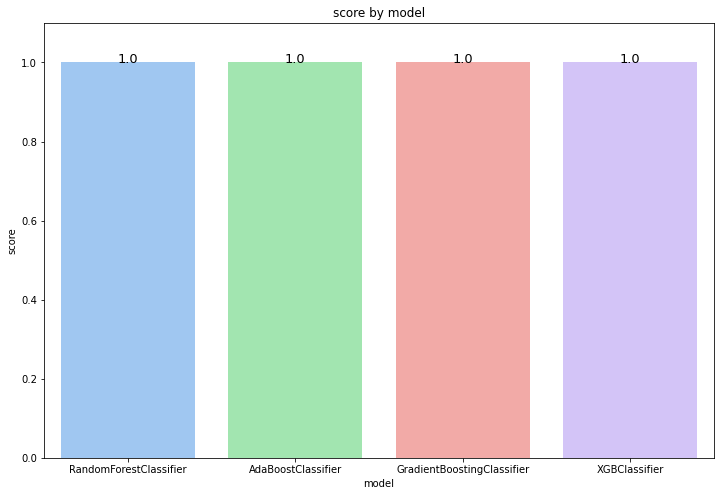

In [52]:
plt.figure(figsize=(12,8))
ax= sns.barplot(data=score_df,x='model',y='score')
plt.ylim(0,1.1)
for p in ax.patches:   
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height,height ,ha="center",fontsize=13)
plt.title('score by model')

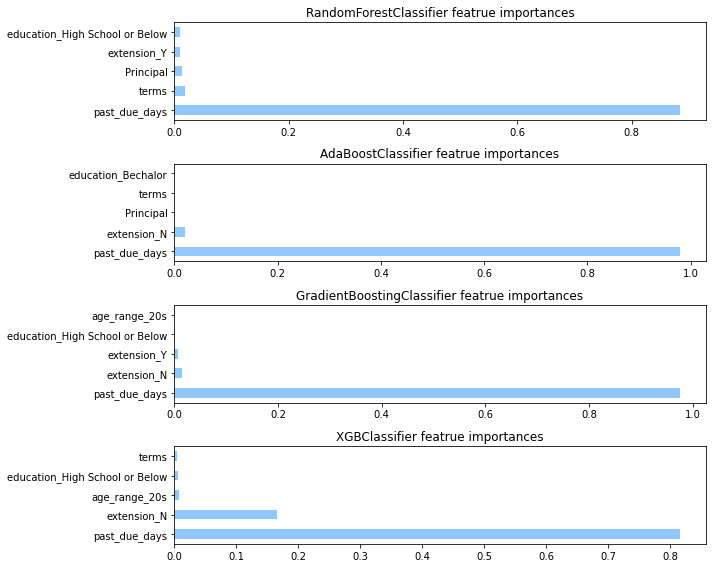

In [53]:
fig,axes = plt.subplots(4,1,figsize=(10,8))
num=0
for i in [rf,ada,gra,xgb]:
    
    feat_importances = pd.Series(i.feature_importances_, index=train_x.columns)
    feat_importances.nlargest(5).plot(kind='barh',ax=axes[num])

    
    axes[num].set(title='{} featrue importances'.format(i.__class__.__name__))
    plt.tight_layout()
    num+=1


'past_due_days' most affected the accuracy of the model.

- nerual network by pytorch

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

Range (range) between '0 to 1'manually with minimum (minimum) and maximum (maximum) values

In [55]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train_x_scale = minmax.fit_transform(train_x)
test_x_scale = minmax.fit_transform(test_x)

In [56]:
trainx_tensor = torch.tensor(train_x_scale,dtype=torch.float)
trainy_tensor = torch.tensor(train_y.values,dtype = torch.float)

testx_tensor = torch.tensor(test_x_scale,dtype = torch.float)
testy_tensor = torch.tensor(test_y.values,dtype = torch.float)

trainx_tensor = trainx_tensor.type(torch.FloatTensor)
trainy_tensor = trainy_tensor.type(torch.LongTensor)

testx_tensor = testx_tensor.type(torch.FloatTensor)
testy_tensor = testy_tensor.type(torch.LongTensor)

In [57]:
num_epoch = 10000
learning_rate = 0.0002
loss_func = nn.CrossEntropyLoss()
w = data.shape[1]-1  # number of input's values

In [58]:
def model_RRRLR():
    model = nn.Sequential(
          nn.Linear(1*w,6*w), nn.ReLU(),
          nn.Linear(6*w,10*w), nn.ReLU(),
          nn.Linear(10*w,6*w), nn.ReLU(),
          nn.Linear(6*w,1*w), nn.LeakyReLU(),
          nn.Linear(w,3) )
    return model

tensor(1.1341, grad_fn=<NllLossBackward>)
tensor(0.0060, grad_fn=<NllLossBackward>)


Text(0.5, 1.0, 'RRRLR loss array')

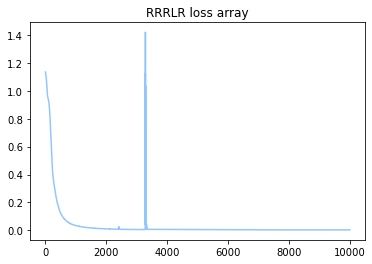

In [59]:

loss_array = []
model = model_RRRLR()
optimizer = optim.Adam(model.parameters(),learning_rate)

for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(trainx_tensor)
    loss = loss_func(output,trainy_tensor)
    if i%5000==0:
        print(loss)
    loss.backward()
    optimizer.step()
    loss_array.append(loss)
plt.plot(loss_array)
plt.title('RRRLR loss array')

In [60]:
output = model(testx_tensor)
result = []
for i in output:
    if i.argmax() == 2:
        result.append(2)
    elif i.argmax() == 1:
        result.append(1)
    else:
        result.append(0)


In [61]:
accuracy_score(test_y.values,result)

0.85

# limitation

The small size of the sample increased the risk of overfit.

# improvement point

Use cross-validation to test your predictive power.